In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import plot_importance
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Target variable
target = 'Exited'

In [7]:
# Drop non-predictive columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Churn Distribution**

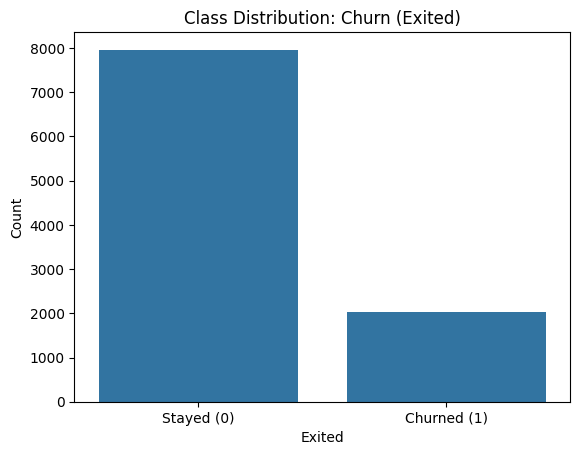

In [9]:
sns.countplot(x='Exited', data=df)
plt.title('Class Distribution: Churn (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed (0)', 'Churned (1)'])
plt.show()

In [10]:
# Check proportions
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [11]:
# Binary encoding for Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [12]:
df_plot = df.copy()
# One-hot encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

**Exploratory Data Analysis (EDA)**

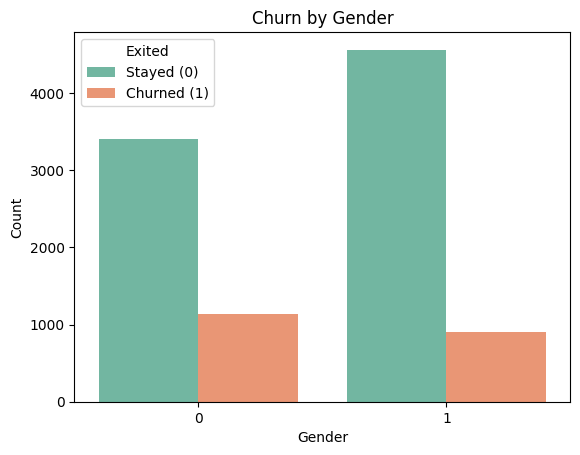

In [13]:
# Churn by Gender
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

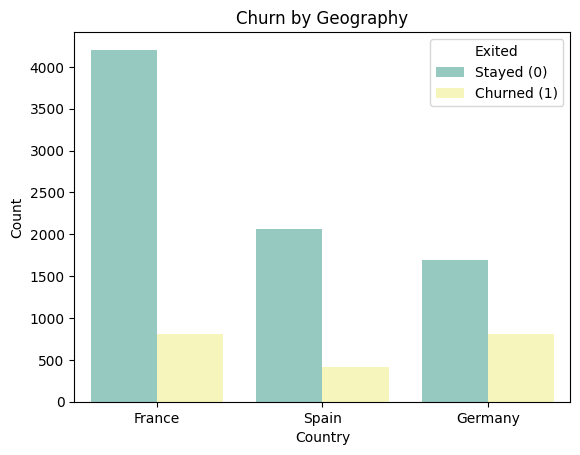

In [14]:
# Churn by Geography
sns.countplot(data=df_plot, x='Geography', hue='Exited', palette='Set3')
plt.title('Churn by Geography')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

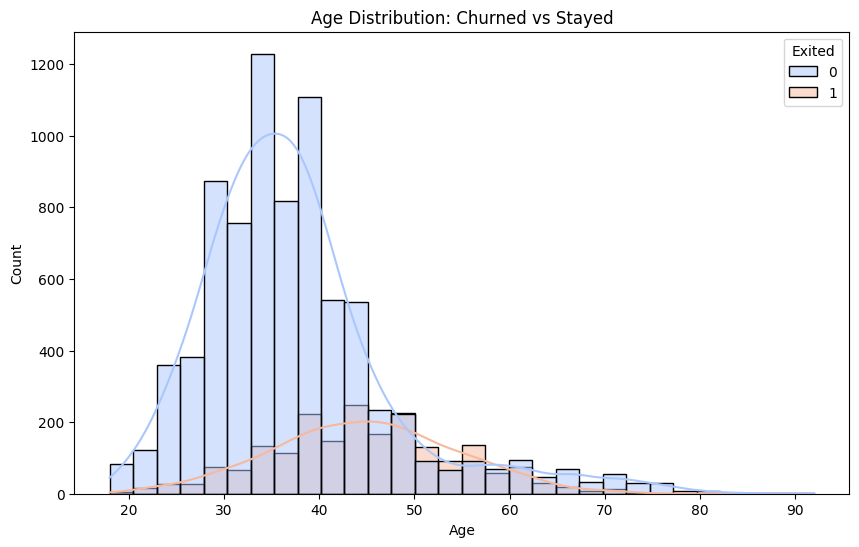

In [15]:
# Age Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution: Churned vs Stayed')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

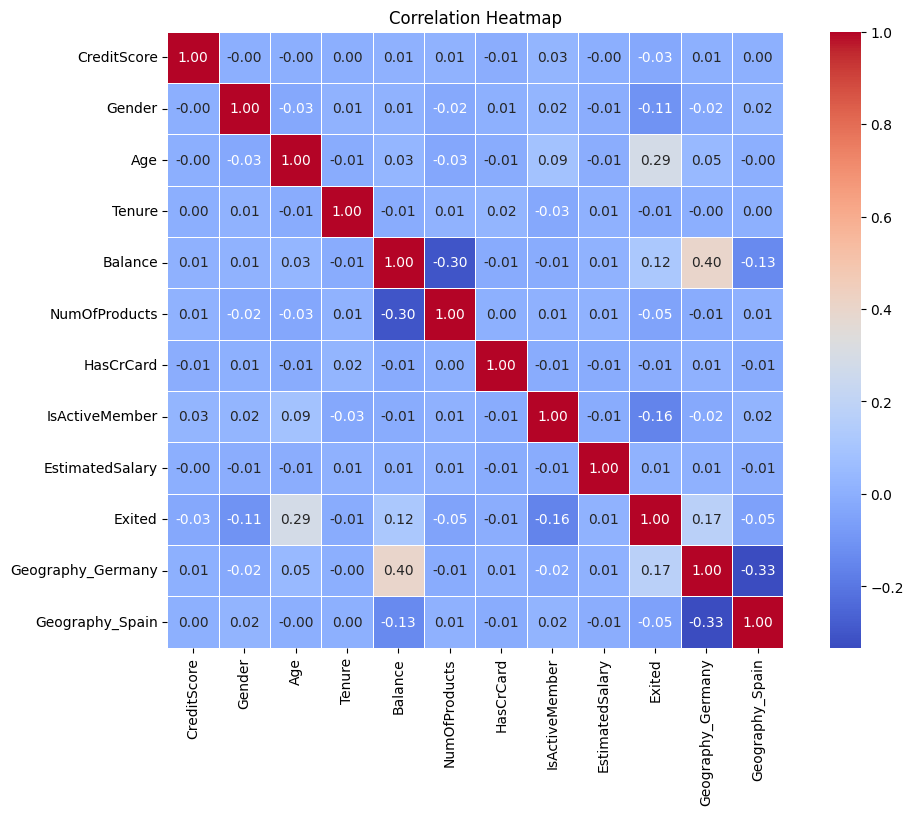

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Feature Scaling**

In [17]:
# Columns to scale
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()

# Fit and transform numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,False,True


**Train-Test Split**

In [19]:
# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


**SMOTE**

In [22]:
# apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64


# **Model Building**

**LogisticRegression**

In [24]:
# Initialising and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [25]:
# Predict
y_pred = lr_model.predict(X_test)

In [26]:
# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1182  411]
 [ 136  271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.40      0.67      0.50       407

    accuracy                           0.73      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.80      0.73      0.75      2000


Accuracy Score: 0.7265


**Random Forest Classifier**

In [27]:
# Initialise the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# Fit on SMOTE-resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
# Predict
y_pred_rf = rf_model.predict(X_test)

In [30]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[1437  156]
 [ 160  247]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.84      0.84      2000


Accuracy Score: 0.842


**Decision Tree**

In [31]:
# Initialising the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [33]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

Confusion Matrix:
 [[1293  300]
 [ 192  215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1593
           1       0.42      0.53      0.47       407

    accuracy                           0.75      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.78      0.75      0.76      2000


Accuracy Score: 0.754


**XGBoost**

In [34]:
# Initialising and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:09:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)

In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))

Confusion Matrix:
 [[1460  133]
 [ 173  234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.64      0.57      0.60       407

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.75      2000
weighted avg       0.84      0.85      0.84      2000


Accuracy Score: 0.847


# **Comparing Model Performance**

In [37]:
# Model performance summary
performance = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Decision Tree"],
    "Accuracy": [0.7265, 0.842, 0.847, 0.75],
    "F1-score (Class 1)": [0.50, 0.61, 0.60, 0.55],
    "Recall (Class 1)": [0.67, 0.61, 0.57, 0.53]
}

performance_df = pd.DataFrame(performance)
display(performance_df)

,Model,Accuracy,F1-score (Class 1),Recall (Class 1)
0,Logistic Regression,0.7265,0.50,0.67
1,Random Forest,0.8420,0.61,0.61
2,XGBoost,0.8470,0.60,0.57
3,Decision Tree,0.7500,0.55,0.53


**Confusion Matrix**

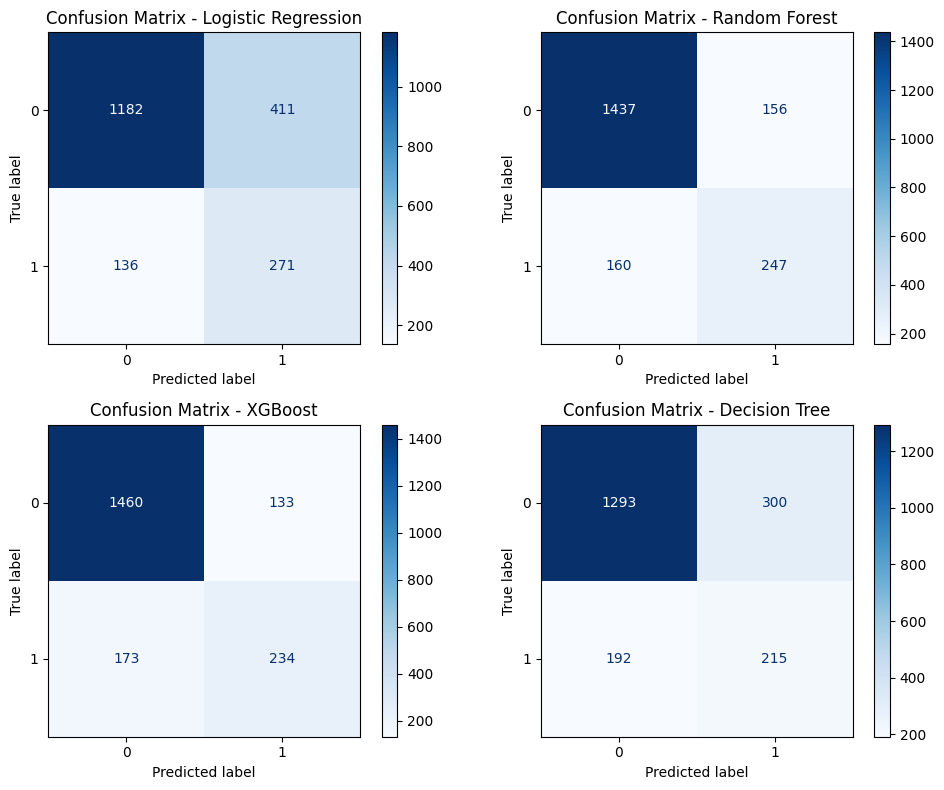

In [38]:
# Define models and predictions
models = {
    "Logistic Regression": (lr_model, y_pred),
    "Random Forest": (rf_model, y_pred_rf),
    "XGBoost": (xgb_model, y_pred_xgb),
    "Decision Tree": (dt_model, y_pred_dt)
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (name, (model, y_pred_model)) in zip(axes.flatten(), models.items()):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_model, ax=ax, cmap='Blues')
    ax.set_title(f"Confusion Matrix - {name}")
    ax.grid(False)

plt.tight_layout()
plt.show()


**ROC Curve**

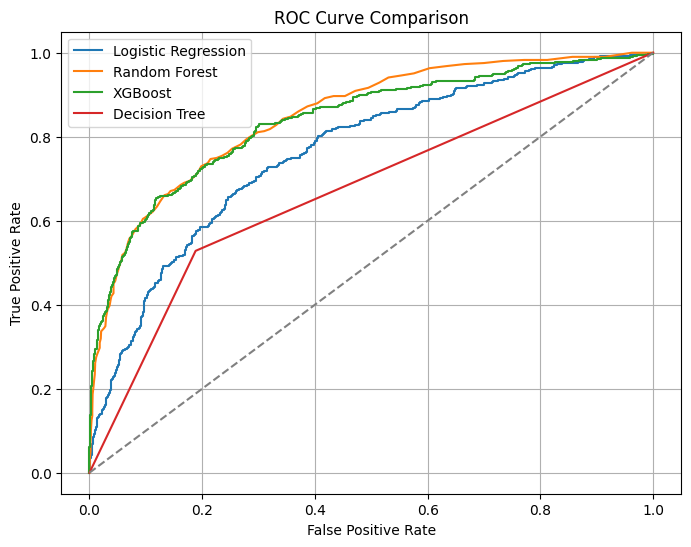

In [39]:
# Get predicted probabilities
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]


# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)


# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
